# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Diccionario de datos
### Users
- <b>user_id</b>: Identificador de usuario.
- <b>first_name</b>: Nombre
- <b>last_name</b>: Apellido
- <b>age</b>: Edad
- <b>reg_date</b>: Fecha de suscripción
- <b>churn_date</b>: Fecha en que dejó de usar el servicio
- <b>city</b>: Ciudad de residencia
- <b>plan</b>: Nombre de la tarifa

### Calls
- <b>id</b>: Identificador de la llamada
- <b>call_date</b>: Fecha de la llamada
- <b>duration</b>: Furación de la llamada (en minutos)
- <b>user_id</b>: Identificador del usuario que realiza la llamada

### Messages
- <b>id</b>: Identificador del SMS
- <b>message_date</b>: Fecha del SMS
- <b>user_id</b>: Identificador del usuario que manda el SMS

### Internet
- <b>id</b>: Identificador de la sesión
- <b>mb_used</b>: Volumen de datos gastados en la sesión (en MB)
- <b>session_date</b>: Fecha de la sesión web
- <b>user_id</b>: identificador del usuario

### Plans
- <b>plan_name</b>: Nombre de la tarifa
- <b>usd_monthly_fee</b>: Pago mensual en dólares
- <b>minutes_included</b>: Minutos incluidos al mes
- <b>messages_included</b>: SMS incluidos al mes
- <b>mb_per_month_included</b>: Datos incluidos al mes (en megabytes)
- <b>usd_per_minute</b>: Precio por minuto exedido
- <b>usd_per_message</b>: Precio por SMS exedido
- <b>usd_per_gb</b>: Precio por gigabyte exedido

El propósito de este proyecto es comparar dos planes de servicio de la empresa Megaline y encontrar cuál de los dos genera más ingresos.
Los pasos que seguiré son:
- Importar las <b>librerías</b> necesarias
- Cargar los Datasets en <b>Dataframes de Pandas</b>
- Analizar los DataFrames y <b>corregir errores</b>
- Cambiar todas las columnas con <b>fechas al tipo datetime</b> de pandas
- Formular una <b>H<sub>0</sub></b> y una <b>H<sub>1</sub></b>
- Hacer las <b>pruebas estadísticas</b> pertinentes para las hipótesis

# Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
user = pd.read_csv('/datasets/megaline_users.csv')
call = pd.read_csv('/datasets/megaline_calls.csv')
web = pd.read_csv('/datasets/megaline_internet.csv')
msg = pd.read_csv('/datasets/megaline_messages.csv')
plan = pd.read_csv('/datasets/megaline_plans.csv')

In [3]:
date_format = '%Y-%m-%d'
mes = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Preparar los datos

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No hay datos Ausentes en el DataFrame, tambien está correcta toda la información<br>
Solo me gustaría cambiar los nombres de las columnas

### Cambiar nombres de Columnas

In [6]:
# Cambio los nombres en el DataFrame plan por nombres más cortos pero igualmente adecuados
plan.columns = ['inc_msg', 'inc_mb', 'inc_min', 'plan_cost', 'extra_gb', 'extra_msg', 'extra_min', 'name']

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
106,1106,Eddy,Garrison,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-10,surf,2018-11-14
351,1351,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",2018-09-05,ultimate,NaN
209,1209,Garret,Paul,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-28,surf,NaN
381,1381,German,Burris,44,"Austin-Round Rock-Georgetown, TX MSA",2018-08-30,surf,NaN
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaN


El DataFRame user tiene valores ausentes en su columna churn_date, el resto de columnas no tiene datos ausentes.<br>
No hay IDs duplicadas.<br>
Las fechas no están en tipo datetime<br>
Los nombres de columnas están bien

### Corregir los datos

In [9]:
# CAmbio los tipos de datos para las columnas con fechas a Datetime
user['churn_date'] = pd.to_datetime(user['churn_date'] ,format=date_format)
user['reg_date'] = pd.to_datetime(user['reg_date'] ,format=date_format)

### Enriquecer los datos

No encontre ninguna manera de agregar nuevas columnas de manera que fuese útil

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
call.sample(5)

,id,user_id,call_date,duration
49654,1179_313,1179,2018-08-04,19.12
27081,1101_408,1101,2018-07-14,8.53
109337,1385_407,1385,2018-08-18,13.95
131356,1472_316,1472,2018-09-18,13.39
112919,1397_614,1397,2018-07-17,0.00


La fecha no está en tipo datetime<br>
La duración debe redondearse hacia arriba<br>
Puede ser buena idea tener el mes en su columna individual

### Corregir los datos

In [12]:
# Fecha a tipo Datetime
call['call_date'] = pd.to_datetime(call['call_date'] , format=date_format)
# Duración de llamadas redondeada hacia arriba
call['duration'] = call['duration'].apply(np.ceil).astype(int)

### Enriquecer los datos

In [13]:
# Extraer el mes en una nueva columna
call['month'] = call['call_date'].apply(lambda time: mes[time.month - 1])

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
msg.sample(5)

,id,user_id,message_date
37734,1249_293,1249,2018-08-14
60026,1381_139,1381,2018-10-22
188,1001_367,1001,2018-10-26
62219,1391_223,1391,2018-11-19
8471,1061_477,1061,2018-11-29


La fecha no está en tipo datetime.<br>
Puede ser buena idea tener el mes en su columna individual

### Corregir los datos

In [16]:
# Fecha a tipo Datetime
msg['message_date'] = pd.to_datetime(msg['message_date'] , format=date_format)

### Enriquecer los datos

In [17]:
# Extraer el mes del mensaje en una nueva columna
msg['month'] = msg['message_date'].apply(lambda time: mes[time.month - 1])

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
web.sample(5)

,id,user_id,session_date,mb_used
70761,1331_12,1331,2018-11-08,569.74
17279,1077_399,1077,2018-04-15,302.19
41099,1185_136,1185,2018-04-21,67.29
68100,1317_43,1317,2018-12-04,511.36
41433,1185_470,1185,2018-05-18,57.08


La fecha no está en tipo datetime.<br>
Puede ser buena idea tener el mes en su columna individual

### Corregir los datos

In [20]:
# Fecha a tipo Datetime
web['session_date'] = pd.to_datetime(web['session_date'] , format=date_format)

### Enriquecer los datos

In [21]:
# Extraer el mes en una nueva columna
web['month'] = web['session_date'].apply(lambda time: mes[time.month - 1])

# Estudiar las condiciones de las tarifas

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plan

,inc_msg,inc_mb,inc_min,plan_cost,extra_gb,extra_msg,extra_min,name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Agregar datos por usuario

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
user_call = pd.pivot_table(call, index='user_id', columns='month', values='id', aggfunc='count', fill_value=0)
user_call = user_call[mes]
user_call.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
user_min = pd.pivot_table(call, index='user_id', columns='month', values='duration', aggfunc='sum', fill_value=0)
user_min = user_min[mes]
user_min.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
user_msg = pd.pivot_table(msg, index='user_id', columns='month', values='id', aggfunc='count', fill_value=0)
user_msg = user_msg[mes]
user_msg.head(3)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
user_mb = pd.pivot_table(web, index='user_id', columns='month', values='mb_used', aggfunc='sum', fill_value=0)
user_mb = user_mb[mes]
user_mb.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14
1004,0.0,0.0,0.0,0.0,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29


Los tablas de los datos agregados muestran que en enero casi no hay registros de consumo para muchos de los clientes en esta muestra y, la candidad de registros va aumentando conforme avanza el año mes a mes.<br><br>
A continuacion agrego todos esas tablas en una sola.

In [27]:
user_use = user[['user_id', 'plan']]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_use_cm = user_call.merge(user_min, left_index=True, right_index=True, how='outer', suffixes=['_call', '_min'])
user_use_mw = user_msg.merge(user_mb, left_index=True, right_index=True, how='outer', suffixes=['_msg', '_web'])
user_u = user_use_cm.merge(user_use_mw, left_index=True, right_index=True, how='outer', suffixes=False)
user_use = user_use.merge(user_u, left_on='user_id', right_index=True, how='outer')
del user_use_cm, user_use_mw, user_u

Hay 10 Clientes que no tienen información de consumo en el año dado,<br>
El clientte con el <b>ID 1129</b> por ejemplo

In [29]:
# Añade la información de la tarifa
user_use = user_use.merge(plan, left_on='plan', right_on='name', how='left', suffixes=False)
user_use = user_use.drop(columns=['name'])
for column in user_use.columns:
    user_use[column] = user_use[column].fillna(0)

In [30]:
user_use.head()

,user_id,plan,Jan_call,Feb_call,Mar_call,Apr_call,May_call,Jun_call,Jul_call,Aug_call,...,Oct_web,Nov_web,Dec_web,inc_msg,inc_mb,inc_min,plan_cost,extra_gb,extra_msg,extra_min
0,1000,ultimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1901.47,1000,30720,3000,70,7,0.01,0.01
1,1001,surf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,...,22330.49,18504.30,19369.18,50,15360,500,20,10,0.03,0.03
2,1002,surf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6552.01,19345.08,14396.24,50,15360,500,20,10,0.03,0.03
3,1003,surf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,27044.14,50,15360,500,20,10,0.03,0.03
4,1004,surf,0.0,0.0,0.0,0.0,21.0,44.0,49.0,49.0,...,14541.63,21850.78,21389.29,50,15360,500,20,10,0.03,0.03


Con todos los datos en una sola tabla es más sencillo calcular las tarifas mensuales de cada usuario usando la función apply()

In [31]:
# Definición de la función que ayuda a calcular el ingreso
month = mes[0] # Variable que define el mes para el cual se hace el cálculo
def calc_income(row): # Recibe una fila como argumento
    # OBTENR LOS DATOS DE CONSUMO EN EL MES
    # Obtiene el costo del plan segun la fila
    plan_cost = row['plan_cost']
    # Obtiene los minutos en llamada según el mes ej. mes[0] es 'Jan' ---> 'Jan' + '_min' = 'Jan_min'
    mins = row[month + '_min']
    # Obtiene los mensajes mandados en el mes dado
    msg = row[month + '_msg']
    # Obtiene los Megabytes consumidos en el mes dado y los convierte a Gigabytes redondeando los decimales hacia arriba
    web = np.ceil(row[month + '_web'] / 1024)
    
    # OBTENER LOS DATOS DE CONSUMO QUE EXEDEN EL PLAN
    # Fórmula ---> (Consumido - Incluído) * (Consumido >= Incluído)
    # Obtiene los minutos extra de consumo
    x_mins = (mins - row['inc_min']) * (mins >= row['inc_min'])
    # Obtiene los mensajes extra de consumo
    x_msg = (msg - row['inc_msg']) * (msg >= row['inc_msg'])
    # Obtiene los Gigabytes extra de consumo
    x_web = (web - row['inc_mb']/1024) * (web >= row['inc_mb']/1024)
    
    # Calcula la Tarifa por mes según el plan y el consumo
    if mins + msg + web == 0:
        income = 0 # Cuando no hay datos de consumo la tarifa será 0
    else:
        income = plan_cost + (x_mins * row['extra_min']) + (x_msg * row['extra_msg']) + (x_web * row['extra_gb'])
    
    return income

In [32]:
# Calcula el ingreso mensual para cada usuario
for i in range(12): # 12 iteraciones de 0 a 11
    # Cambia el mes en cada iteración
    month = mes[i]
    # Calcula el ingreso para cada usuario segun el mes en la variable month
    user_use[month] = user_use.apply(calc_income, axis=1) 

In [33]:
# Muestra de las tarifas mensuales por usuario
user_income = user_use.loc[:, mes[0]:]
user_income.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,90.09,60.0,60.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,60.0,20.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,158.12
4,0.0,0.0,0.0,0.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00


# Estudia el comportamiento de usuario

## Cantidad de usuarios por plan

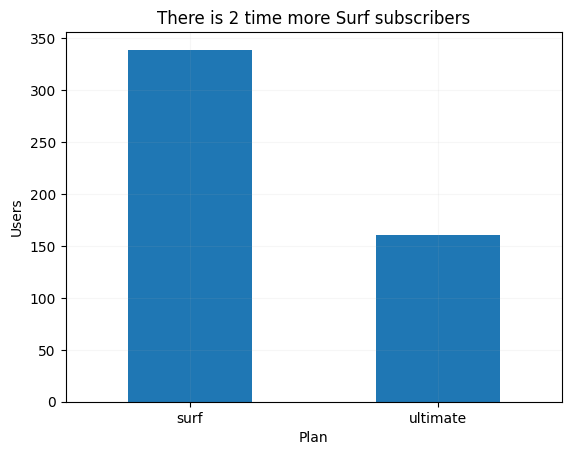

In [34]:
users_by_plan = user.groupby('plan')['user_id'].count()
users_by_plan.plot(kind='bar', rot=0)
plt.title('There is 2 time more Surf subscribers')
plt.xlabel('Plan')
plt.ylabel('Users')
plt.grid(True, alpha=0.1)
plt.show()

Como hay dos veces mas usuarios en Surf que Ultimate, Naturalmente, puede haber doble de mensajes y consumo en general para los usuarios de Surf (cuando no se trabaje con promedios).

### Llamadas

In [35]:
planes = user[['user_id','plan']]
user_c = call.merge(planes, on='user_id', how='left')
user_c.sample(5)

,id,user_id,call_date,duration,month,plan
123445,1435_75,1435,2018-12-01,1,Dec,ultimate
107279,1381_16,1381,2018-12-06,3,Dec,surf
16621,1064_479,1064,2018-08-25,0,Aug,surf
75658,1268_162,1268,2018-04-01,18,Apr,surf
44235,1160_251,1160,2018-06-22,14,Jun,surf


In [36]:
# Reemplacé todos los 0.0 con NaN para que no sean tomados en cuenta en los valores estadísticos descriptivos
# esto considerando que las llamadas que duraron 0.0 min son llamadas no contestadas,
# además teniendo en cuenta que nos interesa la duración de las llamadas
user_c = user_c.replace(0.0, np.NaN)

duration_surf = user_c[user_c['plan'] == 'surf']['duration']
duration_ultimate = user_c[user_c['plan'] == 'ultimate']['duration']
duration_by_plan = pd.DataFrame({'surf':duration_surf, 'ultimate':duration_ultimate})
duration_by_plan.describe()

,surf,ultimate
count,75877.000000,35024.000000
mean,8.888372,8.848904
std,5.360272,5.344112
min,1.000000,1.000000
25%,5.000000,5.000000
50%,8.000000,8.000000
75%,12.000000,12.000000
max,38.000000,37.000000


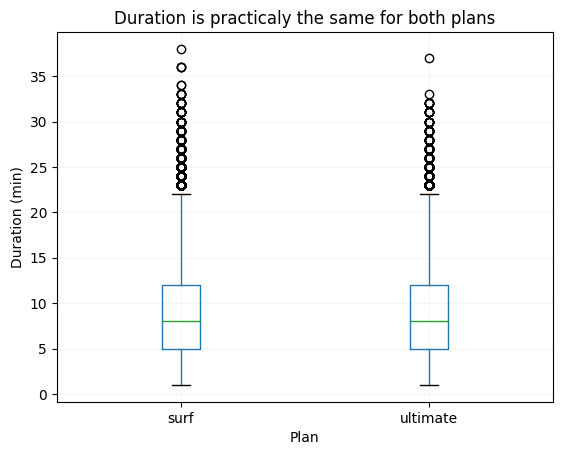

In [37]:
duration_by_plan.plot(kind='box')
plt.title('Duration is practicaly the same for both plans')
plt.xlabel('Plan')
plt.ylabel('Duration (min)')
plt.grid(True, alpha=0.1)
plt.show()

La diferencia más grande a simple vista en loa duración de las llamadas para ambos planes son los valores atípicos<br>
La media es 8.8 min para cada plan y la desviación estandar es 5.3 min para ambos planes también, por lo que en esencia son lo mismo, la duración para promedio de llamadas en ambos planes es la misma.

In [38]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_duration_by_plan = pd.pivot_table(user_c,
                                      index='month', columns='plan', values='duration', aggfunc='mean')
mean_duration_by_plan = mean_duration_by_plan.reindex(mes)

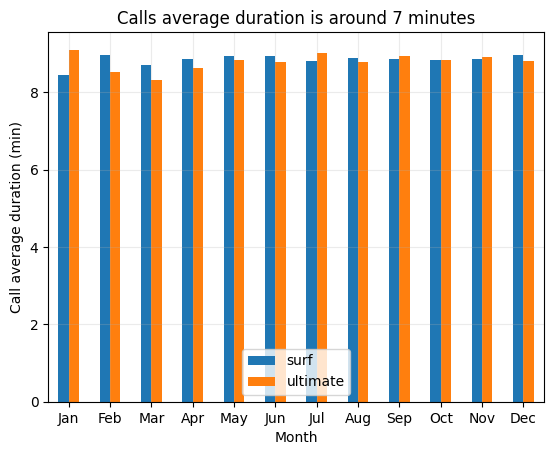

In [39]:
mean_duration_by_plan.plot(kind='bar', title='Calls average duration is around 7 minutes', rot=0)
plt.xlabel('Month')
plt.ylabel('Call average duration (min)')
plt.grid(True, alpha=0.25)
plt.legend(loc='lower center')

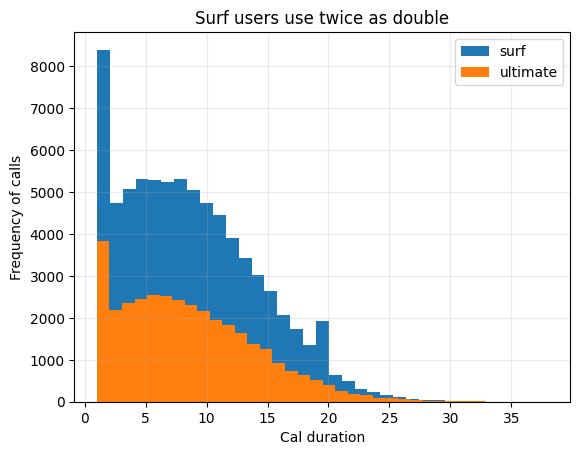

In [40]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
call_surf = user_c[user_c['plan'] == 'surf']
call_ulti = user_c[user_c['plan'] == 'ultimate']

call_surf['duration'].plot(kind='hist', bins=35, rot=0)
call_ulti['duration'].plot(kind='hist', bins=35, rot=0)
plt.title('Surf users use twice as double')
plt.xlabel('Cal duration')
plt.ylabel('Frequency of calls')
plt.grid(True, alpha=0.25)
plt.legend(['surf', 'ultimate'],loc='upper right')
plt.show()

Ahora haré el mismo cálculo para los planes pero por mes

In [41]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# duration_mean_variance_standardev
duration_surf = user_c[user_c['plan'] == 'surf']
duration_mvs_surf = duration_surf.groupby('month')['duration'].agg(['mean', 'var'])
duration_mvs_surf['std'] = duration_mvs_surf['var'].apply(np.sqrt)

duration_ulti = user_c[user_c['plan'] == 'ultimate']
duration_mvs_ulti = duration_ulti.groupby('month')['duration'].agg(['mean', 'var'])
duration_mvs_ulti['std'] = duration_mvs_ulti['var'].apply(np.sqrt)

duration_mvs = duration_mvs_surf.merge(duration_mvs_ulti, left_index=True, right_index=True, suffixes=['_surf', '_ulti'])
duration_mvs = duration_mvs.reindex(mes)
duration_mvs

,mean_surf,var_surf,std_surf,mean_ulti,var_ulti,std_ulti
month,,,,,,
Jan,8.458333,21.785461,4.667490,9.105882,28.786275,5.365284
Feb,8.969799,29.712890,5.450953,8.525680,28.910702,5.376867
Mar,8.714122,27.254961,5.220628,8.316629,28.668924,5.354337
Apr,8.854912,28.061600,5.297320,8.626829,27.362405,5.230909
May,8.933798,29.059804,5.390715,8.837959,29.000750,5.385234
Jun,8.948877,29.830291,5.461711,8.801111,28.260423,5.316053
Jul,8.817490,28.134647,5.304210,9.018253,28.884378,5.374419
Aug,8.882086,28.368766,5.326234,8.779930,28.408262,5.329940
Sep,8.859978,29.431268,5.425059,8.941540,28.293705,5.319183


Aun haciendo el calculo por mes, las duraciones promedio de las llamadas en cada plan siguen estando muy cerca de 8.8.

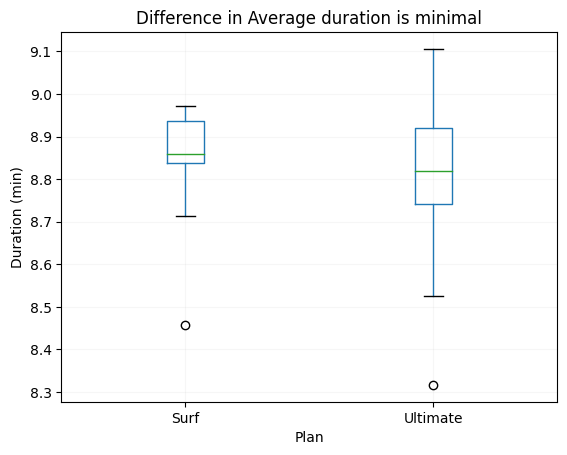

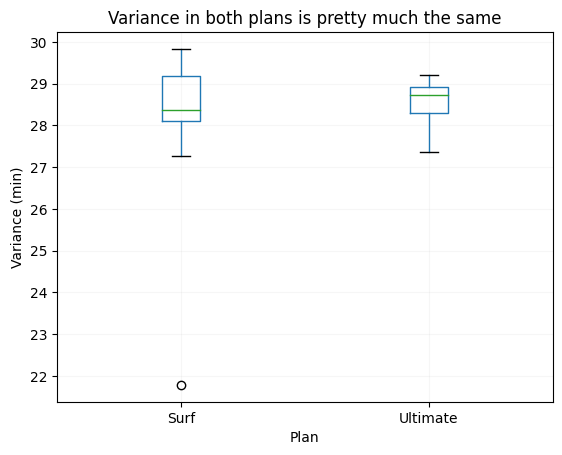

In [42]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duration_mvs[['mean_surf', 'mean_ulti']].plot(kind='box').set_xticklabels(['Surf', 'Ultimate'])
plt.title('Difference in Average duration is minimal')
plt.xlabel('Plan')
plt.ylabel('Duration (min)')
# plt.ylim([0, 7.4]) with this line the graph is barely noticeable
plt.grid(True, alpha=0.1)
plt.show()

duration_mvs[['var_surf', 'var_ulti']].plot(kind='box').set_xticklabels(['Surf', 'Ultimate'])
plt.title('Variance in both plans is pretty much the same')
plt.xlabel('Plan')
plt.ylabel('Variance (min)')
plt.grid(True, alpha=0.1)
plt.show()

# la grafica para std luce igual que para var, puesto que std esta basado en var

- Tanto en <b>Surf</b> como en <b>ultimate</b> la duracion promedio y la desviación estándar es la misma, 8.8 y 5.3 respectivamente, con estos datos es posible decir que, al menos la duracion promedio para las llamadas en ambbos planes es la misma.
- Estos datos tampoco varían mes a mes por lo que podemos asumir que constantemente la duración promedio de las llamadas ha sido de 8.8 min.

### Mensajes

In [43]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msg_plan = msg.merge(user, on='user_id', how='left')
msg_plan = msg_plan[['user_id', 'month', 'plan']]

msg_num_by_plan_month = pd.pivot_table(msg_plan, index='month', columns='plan', values='user_id', aggfunc='count')
msg_num_by_plan_month = msg_num_by_plan_month.reindex(mes)

msg_user_count = pd.pivot_table(msg_plan, index='month', columns='plan', values='user_id', aggfunc=pd.Series.nunique)
msg_user_count = msg_user_count.reindex(mes)

msg_mean_num_by_user = msg_num_by_plan_month / msg_user_count
msg_mean_num_by_user.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,33.309767,39.472325
std,9.179563,10.327408
min,21.000000,20.666667
25%,23.609375,33.270089
50%,34.780747,42.773050
75%,39.780658,47.133632
max,48.326772,53.936508


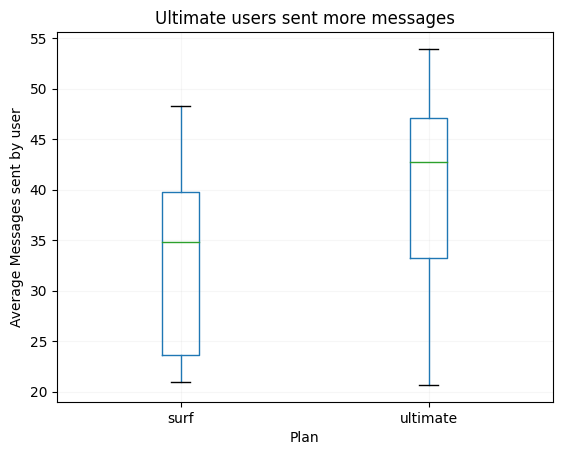

In [44]:
msg_mean_num_by_user.plot(kind='box')
plt.title('Ultimate users sent more messages')
plt.xlabel('Plan')
plt.ylabel('Average Messages sent by user')
plt.grid(True, alpha=0.1)
plt.show()

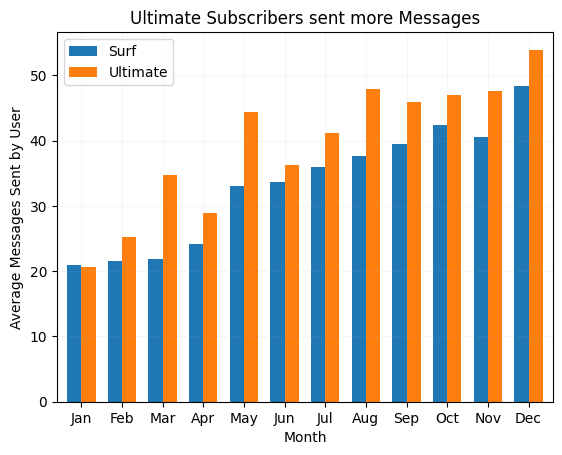

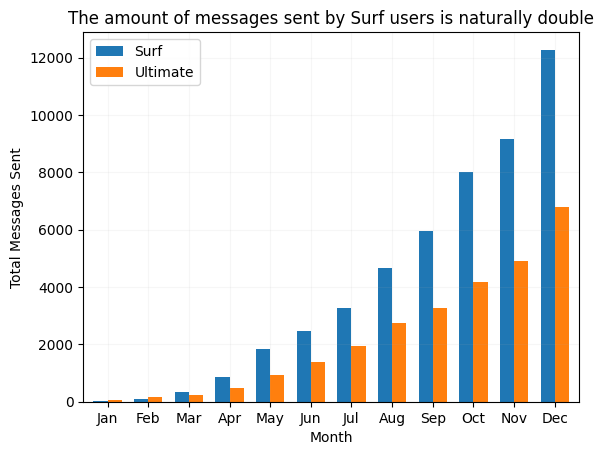

In [45]:
msg_mean_num_by_user.plot(kind='bar', rot=0, width=0.7)
plt.title('Ultimate Subscribers sent more Messages')
plt.xlabel('Month')
plt.ylabel('Average Messages Sent by User')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True, alpha=0.1)
plt.show()

msg_num_by_plan_month.plot(kind='bar', rot=0, width=0.7)
plt.title('The amount of messages sent by Surf users is naturally double')
plt.xlabel('Month')
plt.ylabel('Total Messages Sent')
plt.legend(['Surf', 'Ultimate'])
plt.grid(True, alpha=0.1)
plt.show()

- Aunque la cantidad total de mensajes mandados por los usuarios de surf es 2 veces mayor que de los usuarios de ultimate, la cantidad de mensajes mandados en promedio por usuario es ligeramente mayor para los usuarios ultimate.

### Internet

In [46]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
web_usage = web.merge(user, on='user_id', how='left', suffixes=False)
web_usage = web_usage[['user_id', 'mb_used', 'month', 'plan']]
web_usage = web_usage.replace(0.0, np.NaN)
web_usage

,user_id,mb_used,month,plan
0,1000,89.86,Dec,ultimate
1,1000,NaN,Dec,ultimate
2,1000,660.40,Dec,ultimate
3,1000,270.99,Dec,ultimate
4,1000,880.22,Dec,ultimate
...,...,...,...,...
104820,1499,218.06,Oct,surf
104821,1499,304.72,Dec,surf
104822,1499,292.75,Sep,surf
104823,1499,NaN,Dec,surf


In [47]:
web_usage_by_plan_mb = pd.pivot_table(web_usage, index='month', columns='plan', values='mb_used', aggfunc='sum')
web_usage_by_plan_mb = web_usage_by_plan_mb.reindex(mes)

web_usage_by_plan_un = pd.pivot_table(web_usage, index='month', columns='plan', values='user_id', aggfunc=pd.Series.nunique)
web_usage_by_plan_un = web_usage_by_plan_un.reindex(mes)

web_usage_by_plan = web_usage_by_plan_mb / web_usage_by_plan_un
web_usage_by_plan.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,14605.241252,16226.581745
std,3691.186183,3065.343307
min,4874.860000,6918.092500
25%,13066.274643,16288.971996
50%,16039.607337,17001.777445
75%,16970.654038,17788.899035
max,18189.669590,18323.191854


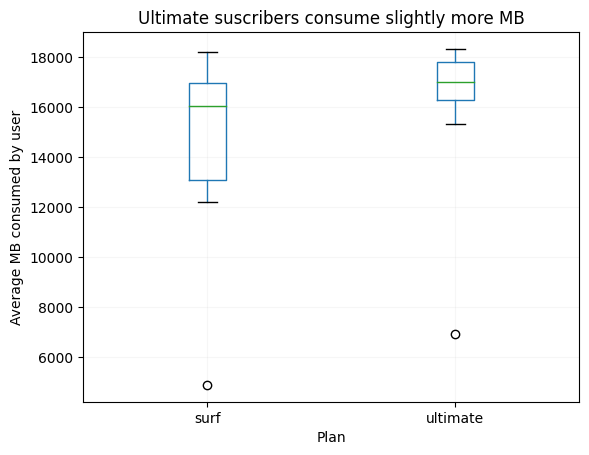

In [48]:
web_usage_by_plan.plot(kind='box')
plt.title('Ultimate suscribers consume slightly more MB')
plt.xlabel('Plan')
plt.ylabel('Average MB consumed by user')
plt.grid(True, alpha=0.1)
plt.show()

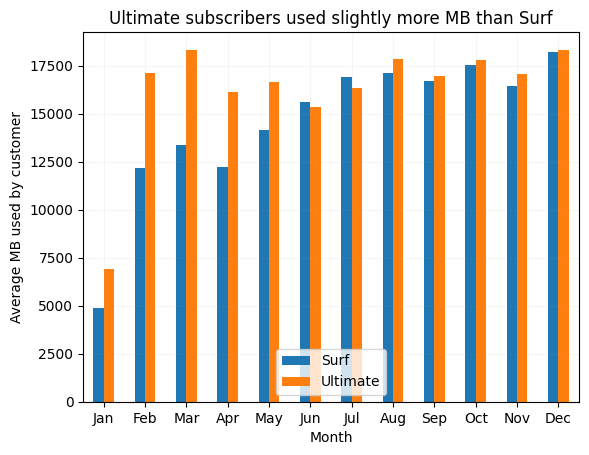

In [49]:
web_usage_by_plan.plot(kind='bar', rot=0)
plt.title('Ultimate subscribers used slightly more MB than Surf')
plt.xlabel('Month')
plt.ylabel('Average MB used by customer')
plt.grid(True, alpha=0.1)
plt.legend(['Surf', 'Ultimate'], loc='lower center')
plt.show()

In [50]:
# Prueba las hipótesis H0 - los consumos de MB en ambos planes es el mismo
surf_mb = web_usage_by_plan['surf']
ulti_mb = web_usage_by_plan['ultimate']

alpha = 0.05

results = st.ttest_ind(surf_mb, ulti_mb)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("La hipotesis Nula es rechazada")
else:
    print("No se puede rechazar la hipótesis nula")

valor p: 0.25429193151486496
No se puede rechazar la hipótesis nula


- Aunque en apariencia los usuarios ultimate usan más MB, no es así, dado que el valor-p es 0.25, eso indica que el 25% de las veces obtendríamos un valor tan extremo como el dado en el consumo de MB para esta muestra, eso es una probabilidad muy alta y por eso no podemos decir que sean diferentes los consumos de MB en los diferentes planes.

## Ingreso

In [51]:
# Get the incomes
incomes = user_use.loc[:, ['plan', mes[0], mes[1], mes[2], mes[3], mes[4], mes[5], mes[6], mes[7], mes[8], mes[9], mes[10], mes[11]]]
surf_incomes = incomes[incomes['plan'] == 'surf']
ultimate_incomes = incomes[incomes['plan'] == 'ultimate']

surf_incomes = surf_incomes.drop(columns='plan')
ultimate_incomes = ultimate_incomes.drop(columns='plan')

surf_incomes = surf_incomes.stack()
ultimate_incomes = ultimate_incomes.stack()

surf_incomes = surf_incomes.replace(0.0, np.NaN).dropna()
ultimate_incomes = ultimate_incomes.replace(0.0, np.NaN).dropna()

incomes_by_plan = pd.DataFrame({'surf':surf_incomes, 'ultimate':ultimate_incomes})
incomes_by_plan = incomes_by_plan[['surf', 'ultimate']]
incomes_by_plan

surf  ultimate
0   Dec     NaN      70.0
1   Aug   20.00       NaN
    Dec   60.00       NaN
    Nov   60.00       NaN
    Oct   90.09       NaN
...         ...       ...
498 Sep  100.00       NaN
499 Dec   90.00       NaN
    Nov   40.00       NaN
    Oct   70.00       NaN
    Sep   20.00       NaN

[2293 rows x 2 columns]

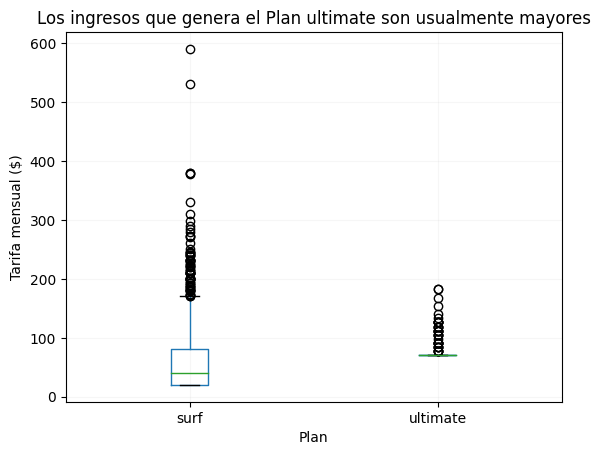

,surf,ultimate
count,1573.000000,720.000000
mean,60.706408,72.313889
std,55.388042,11.395108
min,20.000000,70.000000
25%,20.000000,70.000000
50%,40.360000,70.000000
75%,80.360000,70.000000
max,590.370000,182.000000


In [52]:
incomes_by_plan.plot(kind='box')
plt.title('Los ingresos que genera el Plan ultimate son usualmente mayores')
plt.xlabel('Plan')
plt.ylabel('Tarifa mensual ($)')
plt.grid(True, alpha=0.1)
plt.show()
incomes_by_plan.describe()

- Aunquela tarifa promedio para los suscriptores ultimate es mayor, los usuarios surf pueden llegar a gastar mucho más en sus tarifas mensuales, es por esto que no es tan fácil determinar cual de los dos genera más ingresos.
- Para poder determinar estadísticamente cuál de los dos genera más ingresos o si generan igual, será necesario realizar pruebas de hipótesis estadísticas.

# Prueba las hipótesis estadísticas

Hipotesis Nula <b>H<sub>0</sub></b><br>
Los ingresos de Ambos Planes son Iguales<br><br>
Hipotesis Alternativa <b>H<sub>1</sub></b><br>
Los ingresos de los Planes son Diferentes

In [53]:
# Prueba las hipótesis
surf_inc = surf_incomes
ulti_inc = ultimate_incomes

alpha = 0.05

results = st.ttest_ind(surf_inc, ulti_inc, equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("La hipotesis Nula es rechazada")
else:
    print("No se puede rechazar la hipótesis nula")

valor p: 3.1703905481135734e-15
La hipotesis Nula es rechazada


- Si la hipotesis Nula es rechazada entonces los ingresos por plan si son diferentes.
- Basándome en que la tarifa media de los usuarios surf es mayor, realizaré una prueba estadística para determinar si en efecto es mayor.

In [54]:
# Prueba de hipótesis H0 - Las tarifas son iguales para ambos planes
m_ultimate = ultimate_incomes
tarifa_media_de_surf = 60.7

alpha = 0.05 

results = st.ttest_1samp(m_ultimate, tarifa_media_de_surf)

print('valor-p: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (m_ultimate.mean() > tarifa_media_de_surf):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p:  9.767638034782731e-114
Rechazamos la hipótesis nula


- Dado que la prueba arrojó que se debe rechazar la hipótesis, podemos decir que el ingreso proviniente del plan <b>ultimate</b> es significativamente mayor que el que proviene del plan surf.

In [55]:
# ingresos NY-NJ
income_zone = user_use.loc[:, ['user_id', mes[0], mes[1], mes[2], mes[3], mes[4], mes[5], mes[6], mes[7], mes[8], mes[9], mes[10], mes[11]]]
income_zone = income_zone.merge(user, on='user_id', how='left')
income_zone = income_zone.drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'churn_date'])
income_zone.head(3)

,user_id,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,city,plan
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,90.09,60.0,60.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,60.0,20.0,"Las Vegas-Henderson-Paradise, NV MSA",surf


In [56]:
ny_nj_income = income_zone[income_zone['city'].str.contains('NY-NJ')]
other_zone_income = income_zone[~income_zone['city'].str.contains('NY-NJ')]

ny_nj_income = ny_nj_income.drop(columns=['plan', 'city', 'user_id'])
other_zone_income = other_zone_income.drop(columns=['plan', 'city', 'user_id'])

ny_nj_income = ny_nj_income.stack()
other_zone_income = other_zone_income.stack()

ny_nj_income = ny_nj_income.replace(0.0, np.NaN).dropna()
other_zone_income = other_zone_income.replace(0.0, np.NaN).dropna()

incomes_by_zone = pd.DataFrame({'ny_nj':ny_nj_income, 'other':other_zone_income})
incomes_by_zone = incomes_by_zone[['ny_nj', 'other']]
incomes_by_zone

ny_nj  other
0   Dec    NaN  70.00
1   Aug    NaN  20.00
    Dec    NaN  60.00
    Nov    NaN  60.00
    Oct    NaN  90.09
...        ...    ...
498 Sep  100.0    NaN
499 Dec    NaN  90.00
    Nov    NaN  40.00
    Oct    NaN  70.00
    Sep    NaN  20.00

[2293 rows x 2 columns]

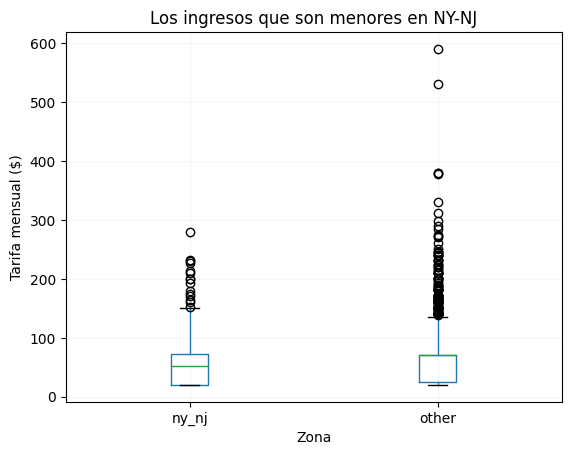

,ny_nj,other
count,377.000000,1916.000000
mean,59.921353,65.222771
std,43.537865,47.170414
min,20.000000,20.000000
25%,20.000000,24.927500
50%,51.770000,70.000000
75%,72.460000,70.000000
max,280.000000,590.370000


In [57]:
#ny_nj_income.plot(kind='box')
incomes_by_zone.plot(kind='box')
plt.title('Los ingresos que son menores en NY-NJ')
plt.xlabel('Zona')
plt.ylabel('Tarifa mensual ($)')
plt.grid(True, alpha=0.1)
plt.show()
incomes_by_zone.describe()

Hipotesis Nula <b>H<sub>0</sub></b><br>
Los ingresos de la sona NY-NJ es igual al resto de zonas<br><br>
Hipotesis Alternativa <b>H<sub>1</sub></b><br>
Los ingresos de Ambos Planes son Diferentes

In [58]:
# Prueba las hipótesis
ny_nj = ny_nj_income
other = other_zone_income

alpha = 0.05

results = st.ttest_ind(ny_nj, other)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("La hipotesis Nula es rechazada")
else:
    print("No se puede rechazar la hipótesis nula")

valor p: 0.043557431621342436
La hipotesis Nula es rechazada


# Conclusión general

- La duración promedio de las llamadas en ambos planes es la misma para ambos plames.
- La cantidad promedio de mensajes enviados en promedio por cada plan es casi la misma (ligeramente mayor para los suscriptores ultimate).
- La cantidad de MB consumidos en ambos planes también es muy similar, los datos no proporcionan información suficiente para afirmar que son diferentes los consumos.
- Pero, los Ingresos provinientes del plan Ultimate sí son estadistícamente mayores.
- En esencia el consumo es el mismo para ambos planes pero los ingresos del plan ultimate son mayores.
- Con la información previa parece claro que el presupuesto de marketing debería dedicarse a promover el plan ultimate.